In [40]:
import xarray as xr
from matplotlib import pyplot as plt
from cartopy import crs as ccrs
import numpy as np

In [41]:
# Function to plot temperature using cartopy
def contour_plot(ds):
    # Specify projection
    crs = ccrs.PlateCarree()

    # Create figure and axes
    fig,ax = plt.subplots(subplot_kw={'projection':crs})

    # Specify variables
    X = ds['lon']
    Y = ds['lat']
    Z = ds.squeeze()

    # Create contour plot of SST
    im = ax.contourf(X,Y,Z,transform=crs)

    # Add grid lines, coastlines
    ax.gridlines()
    ax.coastlines()

    # Set colorbar
    cbar = plt.colorbar(im,ax=ax,orientation='horizontal',fraction=0.05,pad=0.05)
    cbar.set_label('$^\circ\,K$',fontsize=12)

In [57]:
# Function to plot area-weighted annual mean temperature for a region
def area_weighted(temp_data,area_data,region):
    # Get area, temperature data for region
    area = area_data.sel(lon=masks[region][0],lat=masks[region][1])
    temp = temp_data.sel(lon=masks[region][0],lat=masks[region][1])
    
    # Calculate area-weighted average
    area_mean = (temp*area).sum(['lon','lat'])/area.sum(['lon','lat'])
    
    # Create plot
    fig, ax = plt.subplots()
    area_mean.plot(ax=ax)
    ax.set_title('Area-Weighted Average Annual Land Temperature: ' + region)

In [54]:
# Specify root directory, experiment, filename format
rootdir = '/local/ss23/GFDL_LEs/ATM/'
experiment = 'RCP85'
filename = '/t_ref.rcp85.ens*.1950_2100.nc'
paths = rootdir+experiment+filename

# Load data from matching files
data = xr.open_mfdataset(paths,combine='nested',concat_dim='ensemble')

# Calculate ensemble mean
mean_data = data.mean(dim='ensemble')
mean_annual = mean_data['t_ref'].groupby('time.year').mean()

In [55]:
# Dictionary of region masks, sliced by lon and lat
masks = {}
masks['Northern North America'] = [slice(190,310),slice(45,75)]
masks['Central North America'] = [slice(230,310),slice(35,45)]
masks['South-Central America'] = [slice(230,330),slice(-35,35)]
masks['Southern South America'] = [slice(270,330),slice(-60,-35)]
masks['China'] = [slice(75,135),slice(22.5,50)]
masks['India'] = [slice(70,90),slice(10,30)]
masks['Oceania'] = [slice(105,165),slice(-45,10)]

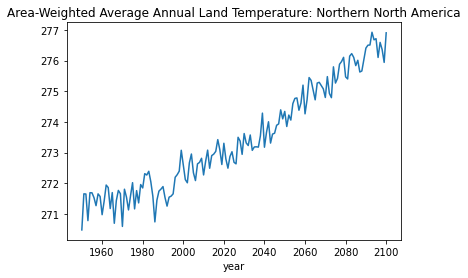

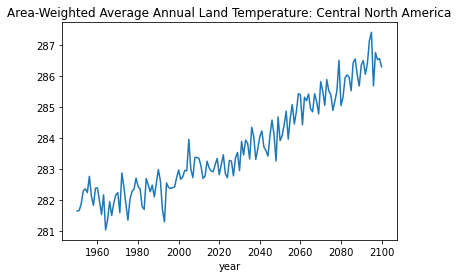

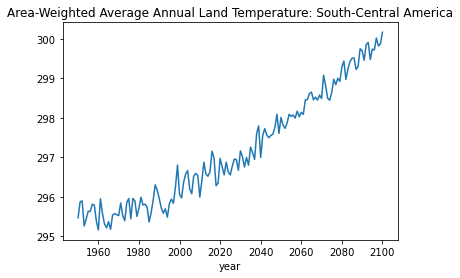

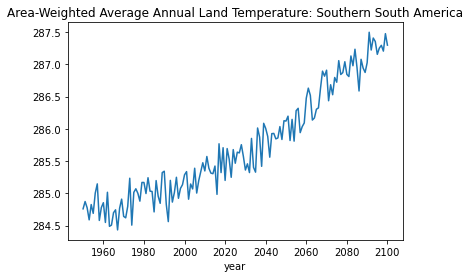

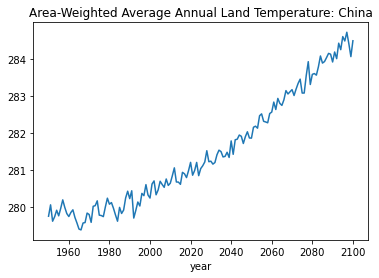

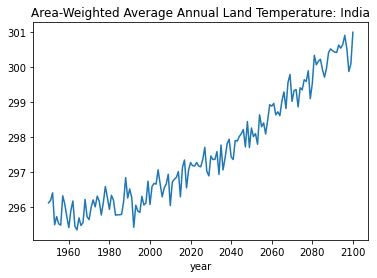

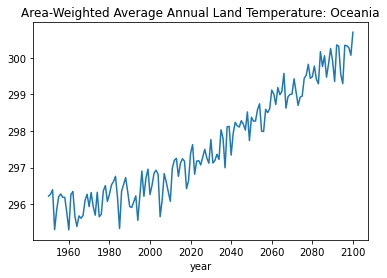

In [58]:
# Load area data
filename_area = 'land_static.nc'
path_area = rootdir+filename_area
land_area = xr.open_dataset(path_area)['land_area']

# Plot regions
for region in masks.keys():
    area_weighted(mean_annual,land_area, region)

Text(0.5, 1.0, 'Area-Weighted Average Annual Land Temperature: Global')

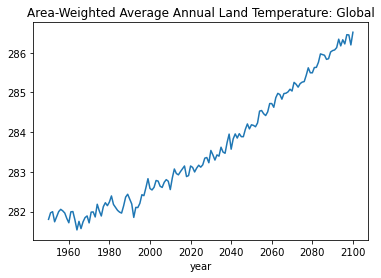

In [60]:
# Calculate global area-weighted average
area_mean = (mean_annual*land_area).sum(['lon','lat'])/land_area.sum(['lon','lat'])
    
# Create plot
fig, ax = plt.subplots()
area_mean.plot(ax=ax)
ax.set_title('Area-Weighted Average Annual Land Temperature: Global')